# IMDB opdracht uitwerkingen Bas Levering.

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Verover de data. Het is een dataset van IMDB met filmrecensies. De labels zijn binair en geven aan of een film wel of geen aanrader is volgens de reviews.

In [ ]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=42,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

bekijk de geimporteerde data.

In [ ]:
print("Categorieën:", np.unique(X_train))
print("Gemiddelde review lengte:", np.mean([len(i) for i in X_train]))
print("Aantal unique woorden:", len(np.unique(np.hstack(X_train))))


De input is in deze vorm lastig te verwerken voor een neuraal netwerk. De getallen zijn categorische labels. Daarom gebruiken we One-hot-encoding. Helaas kan de `OneHotEncoder` uit sklearn niet overweg met deze input. Daarom maken we de input handmatig geschikt voor het neurale netwerk.

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    # Maak een matrix van de vorm (len(sequences), dimension) met nullen
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # zet de juiste waarden in results[i] op 1
    return results

In [ ]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')


Controleer of het omzetten van de data goed gegaan is

In [ ]:
print(X_train.dtype)
print(y_train.dtype)

Maak een neuraal netwerk dat met deze data overweg kan.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(1000, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='relu'))


Kies een loss function en optimizer en compileer het netwerk. Bedenk hierbij goed welke het meest geschikt is voor het probleem dat je aan het oplossen bent en voor de vorm van de output.

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"])

model.summary()

Split in train en validatieset

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.1, random_state=6)


Train je model model met de gemaakte train- en validatieset. 

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=10, batch_size=100)

225/225 [==============================] - 26s 115ms/step - loss: 0.1434 - accuracy: 0.9833 - val_loss: 0.9448 - val_accuracy: 0.8760

Plot een learning curve. Zet de accuraatheid uit tegen de epochs en maak onderscheid tussen de training en validatie data. Wat zou volgens dit figuur het optimale aantal epochs zijn?

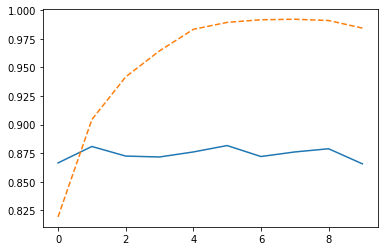

In [20]:

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'], linestyle='dashed')
plt.show()

Plot een foutcurve. Zet de loss uit tegen de epochs en maak onderscheid tussen de training en validatie data. Bekijk of er misschien sprake is van overfitting/underfitting.

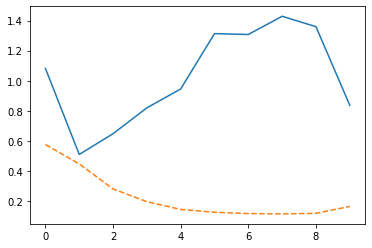

In [21]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'], linestyle='dashed')
plt.show()



Test je model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

766/782 [============================>.] - ETA: 0s - loss: 0.8993 - accuracy: 0.8507  

Kijk wat er gebeurt met de foutcurves van de train en validatiedata en met de testscore als je verschillende netwerken maakt met verschillende instellingen (aantal lagen, aantal neuronen, optimizer).

In [ ]:
model_layer = models.Sequential()
model_layer.add(layers.Dense(1000, input_shape=(10000,), activation='relu'))
model_layer.add(layers.Dense(100, activation='sigmoid'))
model_layer.add(layers.Dense(1, activation='sigmoid'))

model_layer.compile(Adam(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])

history_layers = model_layer.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=10, batch_size=100, verbose=0)

plt.subplots(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history_layers.history['val_loss'])
plt.plot(history_layers.history['loss'], linestyle='dashed')

plt.subplot(1, 2, 2)
plt.title('Accuracyy')
plt.plot(history_layers.history['val_accuracy'])
plt.plot(history_layers.history['accuracy'], linestyle='dashed')
plt.show()

In [ ]:
model_node = models.Sequential()
model_node.add(layers.Dense(500, input_shape=(10000,), activation='relu'))
model_node.add(layers.Dense(50, activation='relu'))
model_node.add(layers.Dense(5, activation='sigmoid'))
model_node.add(layers.Dense(1, activation='sigmoid'))

model_node.compile(Adam(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])

history_nodes = model_node.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=10, batch_size=100, verbose=0)

plt.subplots(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history_nodes.history['val_loss'])
plt.plot(history_nodes.history['loss'], linestyle='dashed')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history_nodes.history['val_accuracy'])
plt.plot(history_nodes.history['accuracy'], linestyle='dashed')
plt.show()

In [ ]:
print(model_layer.evaluate(X_test, y_test))
print(model_node.evaluate(X_test, y_test))

Bonusvraag: Zoek uit wat dropout lagen voor deep learning zijn en experimenteer met dropout lagen in jouw netwerk. Welke effect heeft dit op de resultaten?

# Mist nog reflectie.